# Gaussian Mixture

In [20]:
import pandas as pd 
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import mixture
from mpl_toolkits import mplot3d
import numpy as np

In [21]:
rfm = pd.read_csv('rfm.csv')
rfm_std = pd.read_csv('rfm_std.csv')

rfm_std.head()

,Unnamed: 0,Recency,Frequency,Monetary,Cluster
0,0,1.409894,-2.438202,3.707716,0
1,1,-2.146498,1.188986,1.414903,3
2,2,0.383971,-0.211465,0.720024,0
3,3,-0.574674,0.461819,0.702287,0
4,4,1.374758,-0.673554,-0.614514,2


In [22]:
rfm_std = rfm_std.drop(['Unnamed: 0','Cluster'], axis = 1)

In [23]:
rfm_std

,Recency,Frequency,Monetary
0,1.409894,-2.438202,3.707716
1,-2.146498,1.188986,1.414903
2,0.383971,-0.211465,0.720024
3,-0.574674,0.461819,0.702287
4,1.374758,-0.673554,-0.614514
...,...,...,...
4333,1.298690,-1.069075,-1.102093
4334,0.999081,-1.324833,-1.735717
4335,-1.178605,-0.934910,-1.113332
4336,-1.662552,2.291307,0.822812


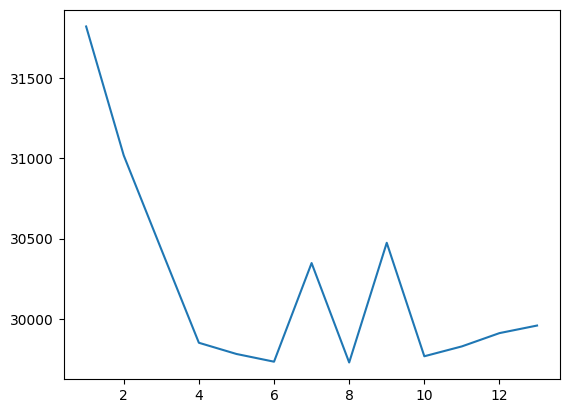

In [24]:
gmm_n_test = [mixture.GaussianMixture(n_components=n,
                                      covariance_type='full',
                                      random_state=323).fit(rfm_std) for n in range(1,14)]
plt.plot(range(1, 14), [g.bic(rfm_std) for g in gmm_n_test])

<Axes: >

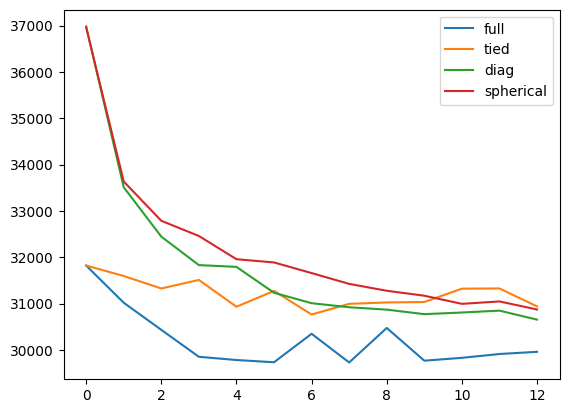

In [25]:
gmm_n_v_test = {v: [mixture.GaussianMixture(n_components=n, 
                                            covariance_type=v, 
                                            random_state=323)
                        .fit(rfm_std) for n in range(1,14)]
                for v in ['full', 'tied', 'diag', 'spherical']}
gmm_n_v_test_bic = {v: [g.bic(rfm_std) for g in m]
                    for v, m in gmm_n_v_test.items()}

pd.DataFrame(gmm_n_v_test_bic).plot()

In [26]:
gmm5 = mixture.GaussianMixture(n_components=4, covariance_type='full',random_state=323).fit(rfm_std)
gmm5_labels = gmm5.predict(rfm_std)
gmm5_labels

array([1, 3, 1, ..., 3, 3, 2], dtype=int64)

In [27]:
rfm_clust = rfm_std.copy()
rfm_clust['Cluster'] = gmm5_labels

In [28]:
rfm_std

,Recency,Frequency,Monetary
0,1.409894,-2.438202,3.707716
1,-2.146498,1.188986,1.414903
2,0.383971,-0.211465,0.720024
3,-0.574674,0.461819,0.702287
4,1.374758,-0.673554,-0.614514
...,...,...,...
4333,1.298690,-1.069075,-1.102093
4334,0.999081,-1.324833,-1.735717
4335,-1.178605,-0.934910,-1.113332
4336,-1.662552,2.291307,0.822812


In [29]:
rfm_clust.groupby('Cluster').size()

Cluster
0     839
1     627
2    1561
3    1311
dtype: int64

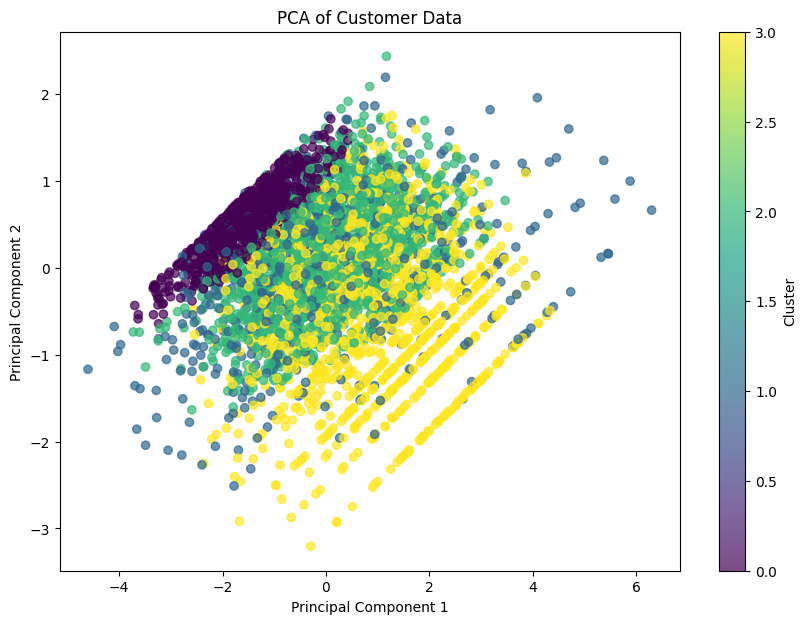

In [30]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(rfm_std)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

pca_df = pd.DataFrame(data=pc_df, columns=['PC1', 'PC2'])
pca_df['Cluster'] = gmm5_labels

plt.figure(figsize=(10, 7))

# Scatter plot of PCA results, colored by cluster
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.7)

plt.title('PCA of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')

plt.savefig('GM_pca.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

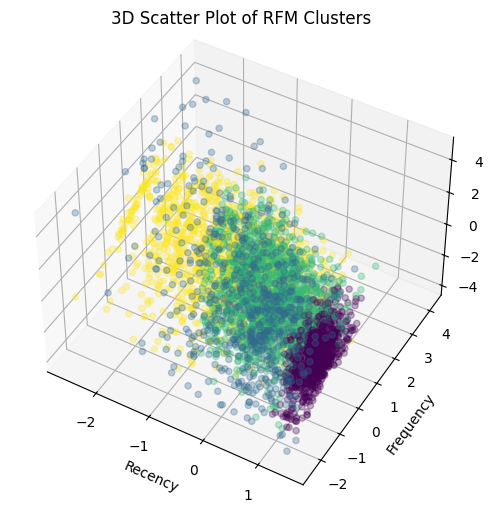

In [31]:
plt.figure(figsize=(10,6))
ax = plt.axes(projection = '3d')

#scatter plot 
ax.scatter3D(
    rfm_clust['Recency'], 
    rfm_clust['Frequency'], 
    rfm_clust['Monetary'], 
    c = rfm_clust['Cluster'], 
    cmap = 'viridis', 
    s = 20, 
    alpha = 0.3
)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.set_title('3D Scatter Plot of RFM Clusters')

ax.view_init(elev=45) 
plt.savefig('GM_3d.png', format='png', dpi=300, bbox_inches='tight')
plt.show()